<a href="https://colab.research.google.com/github/Manish9479/Machine_Learning/blob/main/CNN_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import  Sequential
from tensorflow.keras.layers import  Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
import numpy as np

In [ ]:
from tensorflow.keras.layers import AveragePooling2D

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
(X_train,y_train),(X_test ,y_test)=mnist.load_data()

In [ ]:
len(X_train)

60000

In [ ]:
len(X_test)

10000

In [ ]:
print(len(y_train))
print(len(y_test))

60000
10000


In [ ]:
X_train[0].shape

(28, 28)

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

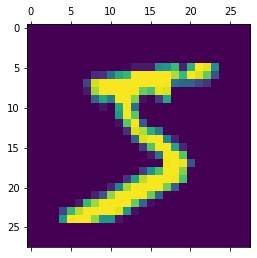

In [ ]:
plt.matshow(X_train[0])

In [ ]:
y_train[0]

5

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
#Reshaping data 
X_train_1 = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2],1))
X_test_1 = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2],1))

print(X_train_1.shape)
print(X_test_1.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
#Normalizing the pixels values
X_train_1 = X_train/255
X_test_1 = X_test/255

# Create the CNN Model

In [ ]:
model = Sequential()
#adding convential layer
model.add(Conv2D(32,(3,3), activation='relu',input_shape=(28,28,1)))
#adding maxpoling layer
model.add(MaxPool2D(2,2))
model.add(BatchNormalization())
model.add(Conv2D(64,(5,5), activation='relu', strides=(1,1), padding = 'valid', kernel_initializer='random_normal'))
model.add(AveragePooling2D())
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_7 (Batc  (None, 13, 13, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_12 (Conv2D)          (None, 9, 9, 64)          51264     
                                                                 
 average_pooling2d_3 (Averag  (None, 4, 4, 64)         0         
 ePooling2D)                                                     
                                                      

In [ ]:
model.compile(loss='sparse_categorical_crossentropy' , optimizer= 'adam' , metrics=['accuracy'])

In [ ]:
history= model.fit(X_train_1, y_train, epochs=10 , validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.1212 - accuracy: 0.9614 - val_loss: 0.0405 - val_accuracy: 0.9878
Epoch 2/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0503 - accuracy: 0.9848 - val_loss: 0.0390 - val_accuracy: 0.9888
Epoch 3/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0368 - accuracy: 0.9886 - val_loss: 0.0316 - val_accuracy: 0.9913
Epoch 4/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0298 - accuracy: 0.9904 - val_loss: 0.0337 - val_accuracy: 0.9898
Epoch 5/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0253 - accuracy: 0.9919 - val_loss: 0.0343 - val_accuracy: 0.9910
Epoch 6/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0234 - accuracy: 0.9921 - val_loss: 0.0612 - val_accuracy: 0.9863
Epoch 7/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0193 - accuracy: 0.9938 - val_loss: 0.0429 - val_accuracy:

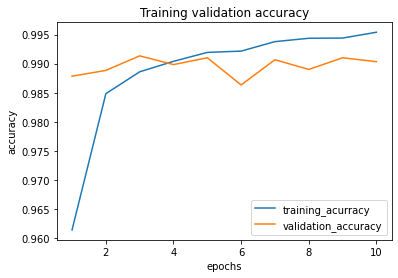

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)
plt.plot(epochs , acc , label ='training_acurracy')
plt.plot(epochs , val_acc , label = 'validation_accuracy')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Training validation accuracy')
plt.show()

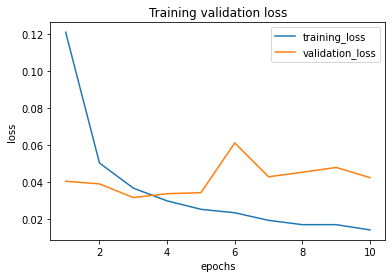

In [ ]:
plt.plot(epochs , loss , label ='training_loss')
plt.plot(epochs , val_loss , label = 'validation_loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Training validation loss')
plt.show()

In [ ]:
model.evaluate(X_test_1,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0297 - accuracy: 0.9916


[0.029700778424739838, 0.991599977016449]

In [ ]:
y_predict = model.predict(X_test_1)

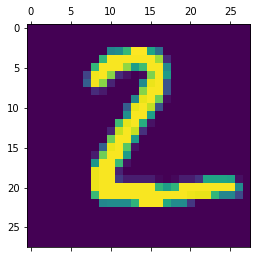

In [ ]:
plt.matshow(X_test[1])

In [ ]:
y_predict[1]

array([7.9479046e-10, 1.2363777e-08, 9.9999928e-01, 6.9190065e-07,
       5.2968649e-12, 2.6451505e-15, 1.2117103e-08, 3.5718106e-11,
       2.9964087e-09, 8.1291385e-14], dtype=float32)

In [ ]:
np.argmax(y_predict[1])

2

In [ ]:
import tensorflow as tf


In [ ]:
y_predict_label = [np.argmax(i) for i in y_predict]

In [ ]:
y_predict_label[1]

2

In [ ]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predict_label)

In [ ]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 972,    1,    1,    0,    0,    0,    3,    1,    2,    0],
       [   0, 1133,    0,    0,    0,    0,    0,    2,    0,    0],
       [   1,    1, 1020,    3,    0,    0,    0,    6,    1,    0],
       [   0,    0,    0, 1004,    0,    6,    0,    0,    0,    0],
       [   0,    1,    0,    0,  975,    0,    1,    0,    1,    4],
       [   0,    0,    0,    4,    0,  887,    1,    0,    0,    0],
       [   2,    3,    0,    0,    1,    3,  947,    0,    2,    0],
       [   0,    3,    2,    1,    0,    1,    0, 1021,    0,    0],
       [   0,    1,    1,    0,    1,    0,    1,    2,  968,    0],
       [   0,    0,    0,    1,    6,    9,    0,    3,    1,  989]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

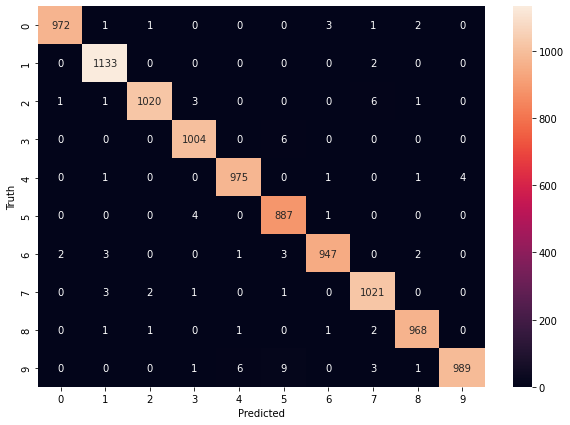

In [ ]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm , annot=True ,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')